In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import time
%matplotlib inline


dataset = pd.read_csv("data 2.csv")

dataset.head()


,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023,character
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka


In [3]:
X = dataset.iloc[:,:-1]
Y_d = dataset.iloc[:,-1]

num_pixels = X.shape[1]
num_classes = 46
img_width = 32
img_height = 32
img_depth = 1

X_images = X.values.reshape(X.shape[0], img_width, img_height)


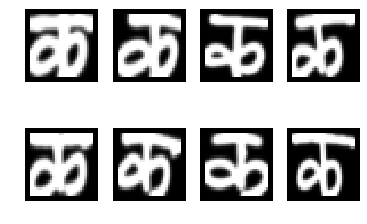

In [4]:
for i in range(1, 9):    
    plt.subplot(240+i)
    plt.axis('off')
    plt.imshow(X_images[i-1], cmap=plt.get_cmap('gray'))
plt.show()

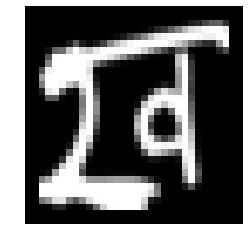

In [5]:
plt.imshow(X_images[2500], cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.show()

In [6]:
# output in binary format
from sklearn.preprocessing import LabelBinarizer
binencoder = LabelBinarizer()
Y = binencoder.fit_transform(Y_d)

# data normalization
X = X / 255

seed = 123 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=seed)

# Decision Tree Classifier

In [7]:
#from sklearn.linear_model import RidgeClassifier
#from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
#from sklearn.neighbors import NearestCentroid
#from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_validate

test_scores, train_scores, fit_time, score_time = [], [], [], []

print('accuracy')

scores = cross_validate(DecisionTreeClassifier(), X, Y_d)
test_scores.append(scores['test_score'].mean())
fit_time.append(scores['fit_time'].mean())
score_time.append(scores['score_time'].mean())

pd.DataFrame({'Classifier': 'DecisionTreeClassifier',
              'Test_Score': test_scores,
              'Fit_Time': fit_time,
              'Score_Time': score_time})


accuracy


,Classifier,Fit_Time,Score_Time,Test_Score
0,DecisionTreeClassifier,50.052989,0.643205,0.415478


# Random Forest Classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

start_time = time.time()
random_forest = RandomForestClassifier(n_estimators=25, max_depth=50, random_state=seed)
random_forest.fit(X_train, y_train)
y_predict = random_forest.predict(X_test)
test_score = accuracy_score(y_test, y_predict)

y_predict = random_forest.predict(X_train)
train_score = accuracy_score(y_train, y_predict)

print(test_score, train_score)
print("--- %s seconds ---" % (time.time() - start_time))

0.489130434783 0.993736413043
--- 133.04193902015686 seconds ---


In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF
from sklearn.manifold import TSNE


# KNN with NMF ( Non-Negative Matrix Factorization)

In [7]:
def knn_nmf():
    #Classification by KNN
    knn_nmf = KNeighborsClassifier(n_neighbors=5, n_jobs=8)
    knn_nmf.fit(train_X_nmf, y_train)
    print("Train score {} ".format(knn_nmf.score(train_X_nmf, y_train)))
    print("Test score {} ".format(knn_nmf.score(test_X_nmf, y_test)))
    

In [8]:
nmf = NMF(n_components=2, random_state=0)
nmf.fit(X_train)
    
train_X_nmf = nmf.transform(X_train)
test_X_nmf = nmf.transform(X_test)

knn_nmf()

Train score 0.024877717391304347 
Test score 0.007934782608695653 


In [9]:
#With more NMF components
nmf = NMF(n_components=30, random_state=0)
nmf.fit(X_train)
train_X_nmf = nmf.transform(X_train)
test_X_nmf = nmf.transform(X_test)

knn_nmf()

Train score 0.8721739130434782 
Test score 0.8152173913043478 


# KNN With PCA (Principal Component Analysis)

In [19]:
#Reducing dimension into 2 components
pca = PCA(n_components=2, random_state=0, whiten=True)
pca.fit(X_train)

#transform the train and test data using the above 2 components
train_X_pca = pca.transform(X_train)
test_X_pca = pca.transform(X_test)

def knn_pca():
    #Classification by KNN- As we expect the score would be very low
    knn_pca = KNeighborsClassifier(n_neighbors=4, n_jobs=8)
    knn_pca.fit(train_X_pca, y_train)
    print("Train score {} ".format(knn_pca.score(train_X_pca, y_train)))
    print("Test score {} ".format(knn_pca.score(test_X_pca, y_test)))
    
knn_pca()

Train score 0.01830163043478261 
Test score 0.007989130434782608 


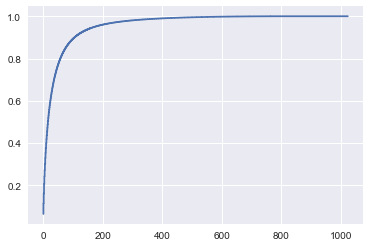

In [13]:
#Lets check how many principal componenets will be required to capture maximum varience
pca = PCA(random_state=0, whiten=True)
pca.fit(X)

#Cumulative sum of varience ratio of all components
exp_var_cum=np.cumsum(pca.explained_variance_ratio_)

plt.step(range(exp_var_cum.size), exp_var_cum)


In [12]:
#With 25 Components

pca = PCA(n_components=25, random_state=0, whiten=True)
pca.fit(X_train)
train_X_pca = pca.transform(X_train)
test_X_pca = pca.transform(X_test)

knn_pca()

Train score 0.9452038043478261 
Test score 0.8878260869565218 


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA


#Reducing dimension into 2 components
pca = PCA(n_components=25, random_state=0, whiten=True)
pca.fit(X_train)

#transform the train and test data using the above 2 components
train_X_pca = pca.transform(X_train)
test_X_pca = pca.transform(X_test)


def randomForest(X_train, X_test):
    random_forest = RandomForestClassifier(n_estimators=25, max_depth=50, random_state=seed)
    random_forest.fit(X_train, y_train)
    y_predict = random_forest.predict(X_test)
    test_score = accuracy_score(y_test, y_predict)

    y_predict = random_forest.predict(X_train)
    train_score = accuracy_score(y_train, y_predict)

    print(test_score, train_score)
    
start_time = time.time()
randomForest(train_X_pca, test_X_pca)
print("--- %s seconds ---" % (time.time() - start_time))


0.416793478261 0.991426630435
--- 92.5604190826416 seconds ---
